# Showing different background bands in chart area

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px

In [87]:
from datetime import date
startDate = date(1999,1,1)
endDate = date(2023,1,1)

### Get data from APIs

In [138]:
# Index P/E ratio history
from nsepy import get_index_pe_history
NiftyPE = get_index_pe_history(symbol="NIFTY", start=startDate, end=endDate)

NiftyPE = NiftyPE.reset_index()

NiftyPE.columns = ['Date', 'PE', 'PB', 'DivYield']
NiftyPE.tail()

,Date,PE,PB,DivYield
5829,2022-06-01,20.45,4.22,1.44
5830,2022-06-02,20.58,4.25,1.43
5831,2022-06-03,20.52,4.24,1.41
5832,2022-06-06,20.50,4.24,1.41
5833,2022-06-07,20.31,4.20,1.43


In [89]:
# Index VIX history

from nsepy import get_history
NiftyVIX = get_history(symbol="INDIAVIX",start=startDate, end=endDate, index=True)

NiftyVIX = NiftyVIX.reset_index()
NiftyVIX.columns = ['Date' ,'Open', 'High', 'Low','Close', 'Previous', 'Change', 'ChangePer']
NiftyVIX.tail()

,Date,Open,High,Low,Close,Previous,Change,ChangePer
3321,2022-06-01,20.4775,21.3375,18.2300,20.8450,20.4775,0.37,0.0179
3322,2022-06-02,20.8450,20.9975,18.3825,20.3200,20.8450,-0.53,-0.0252
3323,2022-06-03,20.3200,20.3200,18.7350,19.9750,20.3200,-0.35,-0.0170
3324,2022-06-06,19.9750,20.6825,18.6500,20.2025,19.9750,0.23,0.0114
3325,2022-06-07,20.2025,21.0700,19.4325,20.4250,20.2025,0.22,0.0110


### Read from a CSV file

In [ ]:
#NiftyPE = pd.read_csv('NiftyPE.csv')
#NiftyPE.columns = ['Date', 'PE']
#NiftyPE.head()

## Plot using matplotlib

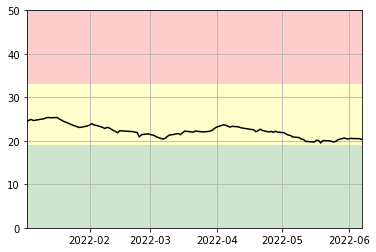

In [85]:
fig, ax = plt.subplots()

ax.plot(NiftyPE.Date, NiftyPE.PE, 'k')
ax.grid()
ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 19, facecolor='green', alpha=0.2)
ax.axhspan(19, 33, facecolor='yellow', alpha=0.2)
ax.axhspan(33, 50, facecolor='red', alpha=0.2)

plt.show()

## Plot using plotly

In [139]:
# PE Chart

fig = px.line(NiftyPE, x='Date', y='PE', 
              hover_data={"Date": "|%B %d, %Y"},
              title='Nifty PE')

# adding horizontal rectangle for coloring
fig.add_hrect(y0=0, y1=12, line_width=0, fillcolor="rgb(0,128,0)", opacity=0.5)
fig.add_hrect(y0=12, y1=15, line_width=0, fillcolor="rgb(154,205,50)", opacity=0.5)
fig.add_hrect(y0=15, y1=22, line_width=0, fillcolor="rgb(255,255,0)", opacity=0.5)
fig.add_hrect(y0=22, y1=30, line_width=0, fillcolor="rgb(255,99,71)", opacity=0.5)
fig.add_hrect(y0=30, y1=40, line_width=0, fillcolor="rgb(255,0,0)", opacity=0.5)
fig.add_hrect(y0=40, y1=45, line_width=0, fillcolor="rgb(255,0,0)", opacity=0.6)

# adding annotation for selective labeling
fig.add_annotation(x="2021-02-08", y=42, text="42", showarrow=False, yshift=10)
fig.add_annotation(x="2020-03-23", y=17.15, text="17.15", showarrow=False, yshift=-10)
fig.add_annotation(x="2019-06-03", y=29.9, text="29.9", showarrow=False, yshift=10)
fig.add_annotation(x="2010-10-13", y=25.91, text="25.91", showarrow=False, yshift=10)
fig.add_annotation(x="2008-10-27", y=10.68, text="10.68", showarrow=False, yshift=-10)
fig.add_annotation(x="2008-01-08", y=28.29, text="28.29", showarrow=False, yshift=10)
fig.add_annotation(x="2003-05-02", y=10.86, text="10.86", showarrow=False, yshift=-10)
fig.add_annotation(x="2000-02-11", y=28.47, text="28.47", showarrow=False, yshift=10)

# adding rangeslider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [118]:
# VIX Chart

fig = px.line(NiftyVIX, x='Date', y='Close',
              hover_data={"Date": "|%B %d, %Y"},
              title='Nifty VIX')

fig.add_hrect(y0=0, y1=15, line_width=0, fillcolor="yellow", opacity=0.4)
fig.add_hrect(y0=15, y1=25, line_width=0, fillcolor="green", opacity=0.4)
fig.add_hrect(y0=25, y1=90, line_width=0, fillcolor="red", opacity=0.4)

fig.show()